<a href="https://colab.research.google.com/github/vngeno/E-COMMERCE-RECOMMENDATION-SYSTEM-/blob/Data-Cleaning/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the ,ibraries
import pandas as pd
import numpy as np

#Load the data
df=pd.read_csv('/content/drive/MyDrive/TEAM STARS FINAL PROJECT/DATA/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')


In [ ]:
#Preview the head
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
#Preview the tail
df.tail(1)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
28331,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2016-12-23T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,"At ninety dollars, the expectionations are low...",You get what your paying for,Hung,http://reviews.bestbuy.com/3545/5620410/review...


In [ ]:
#preview sample
df.sample(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
13656,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-02-24T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I'm new to tablets but this one is pretty easy...,Beginner to Tablets,Britta,http://reviews.bestbuy.com/3545/5620406/review...
3953,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2015-08-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Good Batteries,Four Stars,ByPraemus,"https://www.barcodable.com/upc/841710106442,ht..."
888,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-12T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,It's now about the middle of April and I bough...,"Decent Batteries for Sure, Good Price and They...",ByKristofer Brozio,"https://www.barcodable.com/upc/841710106442,ht..."
27844,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",Amazon,53-004485,2016-12-04T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,Purchased this for my nephew for Christmas. Af...,Nephew,Scooby,http://reviews.bestbuy.com/3545/5620410/review...
11560,AVpe7xlELJeJML43ypLz,2015-12-03T01:23:41Z,2019-04-24T02:17:42Z,AmazonBasics AA Performance Alkaline Batteries...,"B00QWO9P0O,B01IB83NZG,B00MNV8E0C",Amazonbasics,"AA,AAA,Electronics Features,Health,Electronics...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,amazonbasicsaaperformancealkalinebatteries48co...,AmazonBasics,LR6G0748FFPAB-US,2017-04-25T00:00:00.000Z,2017-06-28T00:00:00Z,NaN,NaN,NaN,NaN,1,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are HORRIBLE. I purchased the ...,"Stay Far, Far Away from these batteries",ByVicki A.,"https://www.barcodable.com/upc/841710106411,ht..."


In [ ]:
#get the columns in the dataset
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

### Validity

In [ ]:
# Drop irrelevant columns
df=df.drop(columns={'dateAdded','categories', 'asins', 'dateUpdated', 'imageURLs', 'keys', 'manufacturer','reviews.date', 'reviews.dateSeen',
                    'reviews.id', 'reviews.sourceURLs','reviews.didPurchase','sourceURLs'}, axis=1)
df.head(1)

,id,name,brand,primaryCategories,manufacturerNumber,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,NaN,NaN,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang


### Uniformity

In [ ]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('.','_')
df.columns

Index(['id', 'name', 'brand', 'primarycategories', 'manufacturernumber',
       'reviews_dorecommend', 'reviews_numhelpful', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username'],
      dtype='object')

### Completeness

In [ ]:
#Check for missing values
df.isnull().sum()

id                         0
name                       0
brand                      0
primarycategories          0
manufacturernumber         0
reviews_dorecommend    12246
reviews_numhelpful     12217
reviews_rating             0
reviews_text               0
reviews_title              0
reviews_username           0
dtype: int64

In [ ]:
#Check the percentage of miissing values in reviews_numhelpful
perc=(df.isnull().sum())/df.shape[0]
perc

id                     0.000000
name                   0.000000
brand                  0.000000
primarycategories      0.000000
manufacturernumber     0.000000
reviews_dorecommend    0.432232
reviews_numhelpful     0.431209
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.000000
reviews_username       0.000000
dtype: float64

In [ ]:
df.columns

Index(['id', 'name', 'brand', 'primarycategories', 'manufacturernumber',
       'reviews_dorecommend', 'reviews_numhelpful', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username'],
      dtype='object')

In [ ]:

#Filling nulls with foward fill and backward fill
df = df.ffill().bfill()

In [ ]:
#confirming nulls have been droppped
df.isnull().sum()

id                     0
name                   0
brand                  0
primarycategories      0
manufacturernumber     0
reviews_dorecommend    0
reviews_numhelpful     0
reviews_rating         0
reviews_text           0
reviews_title          0
reviews_username       0
dtype: int64

### Consistency

In [ ]:
#Check for duplicates
df.duplicated().sum()
#There are no duplicated values

0

In [ ]:
df.head()

,id,name,brand,primarycategories,manufacturernumber,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_text,reviews_title,reviews_username
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [ ]:
#Check the dtpes of the columns
df.dtypes

id                      object
name                    object
brand                   object
primarycategories       object
manufacturernumber      object
reviews_dorecommend       bool
reviews_numhelpful     float64
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_username        object
dtype: object

### Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


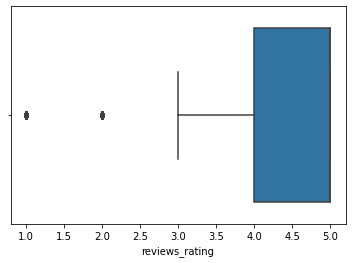

In [ ]:
# We only have 1 numeric column
#We shall check for outliers 
import seaborn as sns
sns.boxplot(df.reviews_rating)
#There are a few outliers but we shall not drop them.

In [ ]:
df.to_csv ('drive/MyDrive/TEAM STARS FINAL PROJECT/DATA/df_clean.csv')